# Lab Titanic + deep learning

# 1 Install Tensorflow

# 2  Import library 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn.model_selection import train_test_split
%matplotlib inline

# 3 นำ Data เข้ามา 

In [90]:
df = pd.read_csv('titanic_train.csv')

df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3.0,"Braund, Mr. Owen Harris",male,22.0,1.0,0.0,A/5 21171,7.2500,NaN,S
1,2,1.0,1.0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1.0,0.0,PC 17599,71.2833,C85,C
2,3,1.0,3.0,"Heikkinen, Miss. Laina",female,26.0,0.0,0.0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1.0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1.0,0.0,113803,53.1000,C123,S
4,5,0.0,3.0,"Allen, Mr. William Henry",male,35.0,0.0,0.0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
888,889,0.0,3.0,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1.0,2.0,W./C. 6607,23.4500,NaN,S
889,890,1.0,1.0,"Behr, Mr. Karl Howell",male,26.0,0.0,0.0,111369,30.0000,C148,C
890,891,0.0,3.0,"Dooley, Mr. Patrick",male,32.0,0.0,0.0,370376,7.7500,NaN,Q
891,</pre></body></html>Ztext/plain,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 893 entries, 0 to 892
Data columns (total 12 columns):
PassengerId    892 non-null object
Survived       891 non-null float64
Pclass         891 non-null float64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null float64
Parch          891 non-null float64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(6), object(6)
memory usage: 83.8+ KB


In [92]:
df['Age'].mean()

29.69911764705882

In [93]:
df['Age'] = df['Age'].fillna(value=df['Age'].mean())

df['Age']

0      22.000000
1      38.000000
2      26.000000
3      35.000000
4      35.000000
         ...    
888    29.699118
889    26.000000
890    32.000000
891    29.699118
892    29.699118
Name: Age, Length: 893, dtype: float64

In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 893 entries, 0 to 892
Data columns (total 12 columns):
PassengerId    892 non-null object
Survived       891 non-null float64
Pclass         891 non-null float64
Name           891 non-null object
Sex            891 non-null object
Age            893 non-null float64
SibSp          891 non-null float64
Parch          891 non-null float64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(6), object(6)
memory usage: 83.8+ KB


In [95]:
df.drop('Cabin', axis=1, inplace=True)

In [96]:
df = df.dropna()

In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 11 columns):
PassengerId    889 non-null object
Survived       889 non-null float64
Pclass         889 non-null float64
Name           889 non-null object
Sex            889 non-null object
Age            889 non-null float64
SibSp          889 non-null float64
Parch          889 non-null float64
Ticket         889 non-null object
Fare           889 non-null float64
Embarked       889 non-null object
dtypes: float64(6), object(5)
memory usage: 83.3+ KB


In [98]:
df.drop(['Ticket','Name','PassengerId'], axis=1, inplace=True)

In [99]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0.0,3.0,male,22.000000,1.0,0.0,7.2500,S
1,1.0,1.0,female,38.000000,1.0,0.0,71.2833,C
2,1.0,3.0,female,26.000000,0.0,0.0,7.9250,S
3,1.0,1.0,female,35.000000,1.0,0.0,53.1000,S
4,0.0,3.0,male,35.000000,0.0,0.0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0.0,2.0,male,27.000000,0.0,0.0,13.0000,S
887,1.0,1.0,female,19.000000,0.0,0.0,30.0000,S
888,0.0,3.0,female,29.699118,1.0,2.0,23.4500,S
889,1.0,1.0,male,26.000000,0.0,0.0,30.0000,C


In [100]:
df = pd.get_dummies(df, drop_first=True)

df

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,0.0,3.0,22.000000,1.0,0.0,7.2500,1,0,1
1,1.0,1.0,38.000000,1.0,0.0,71.2833,0,0,0
2,1.0,3.0,26.000000,0.0,0.0,7.9250,0,0,1
3,1.0,1.0,35.000000,1.0,0.0,53.1000,0,0,1
4,0.0,3.0,35.000000,0.0,0.0,8.0500,1,0,1
...,...,...,...,...,...,...,...,...,...
886,0.0,2.0,27.000000,0.0,0.0,13.0000,1,0,1
887,1.0,1.0,19.000000,0.0,0.0,30.0000,0,0,1
888,0.0,3.0,29.699118,1.0,2.0,23.4500,0,0,1
889,1.0,1.0,26.000000,0.0,0.0,30.0000,1,0,0


In [101]:
X = df.drop(['Survived'], axis = 1)
X

,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,3.0,22.000000,1.0,0.0,7.2500,1,0,1
1,1.0,38.000000,1.0,0.0,71.2833,0,0,0
2,3.0,26.000000,0.0,0.0,7.9250,0,0,1
3,1.0,35.000000,1.0,0.0,53.1000,0,0,1
4,3.0,35.000000,0.0,0.0,8.0500,1,0,1
...,...,...,...,...,...,...,...,...
886,2.0,27.000000,0.0,0.0,13.0000,1,0,1
887,1.0,19.000000,0.0,0.0,30.0000,0,0,1
888,3.0,29.699118,1.0,2.0,23.4500,0,0,1
889,1.0,26.000000,0.0,0.0,30.0000,1,0,0


In [102]:
y = df['Survived']
y

0      0.0
1      1.0
2      1.0
3      1.0
4      0.0
      ... 
886    0.0
887    1.0
888    0.0
889    1.0
890    0.0
Name: Survived, Length: 889, dtype: float64

# 4 แบ่งข้อมูล train, test

In [103]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=1)
print(f'#traning = {X_train.shape[0]}')
print(f'#validation = {X_val.shape[0]}')
print(f'#test = {X_test.shape[0]}')

#traning = 568
#validation = 143
#test = 178


# 5 สร้าง Model ด้วยวิธีการ 3 วิธี 

In [104]:
from tensorflow.keras.models import Sequential

from tensorflow.keras.layers import Dense,Dropout,Activation, Flatten, Conv2D, MaxPooling2D

In [105]:
# เลือกโมเดลนี้ เนื่องจากดูง่ายที่สุด  sequential model

model = Sequential([
    Dense(32, activation='relu', input_shape=(8,)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid'),
])

In [106]:
model.compile(optimizer='sgd',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# 6 Train Model 

In [107]:
# model = get_FunctionalModel()
# model = Get_SubclassModel()
# model.compile(loss='mse',optimizer='SGD') #กรณี sub-class

history = model.fit(X_train,y_train,epochs=500,validation_data=(X_val,y_val))

Train on 568 samples, validate on 143 samples
Epoch 1/500
568/568 [==============================] - 1s 2ms/sample - loss: 2.1450 - accuracy: 0.5845 - val_loss: 0.7671 - val_accuracy: 0.6154
Epoch 2/500
568/568 [==============================] - 0s 110us/sample - loss: 0.7233 - accuracy: 0.6408 - val_loss: 0.5484 - val_accuracy: 0.7552
Epoch 3/500
568/568 [==============================] - 0s 135us/sample - loss: 0.8230 - accuracy: 0.6162 - val_loss: 0.8166 - val_accuracy: 0.5035
Epoch 4/500
568/568 [==============================] - 0s 165us/sample - loss: 0.7311 - accuracy: 0.6338 - val_loss: 0.5287 - val_accuracy: 0.7483
Epoch 5/500
568/568 [==============================] - 0s 151us/sample - loss: 0.6548 - accuracy: 0.6655 - val_loss: 0.9237 - val_accuracy: 0.6224
Epoch 6/500
568/568 [==============================] - 0s 145us/sample - loss: 0.6641 - accuracy: 0.6637 - val_loss: 0.5871 - val_accuracy: 0.7413
Epoch 7/500
568/568 [==============================] - 0s 157us/sample - l

# 7 Plot กราฟ

In [108]:
model.evaluate(X_test,y_test)[1]

178/178 [==============================] - 0s 93us/sample - loss: 0.4578 - accuracy: 0.7865


0.78651685

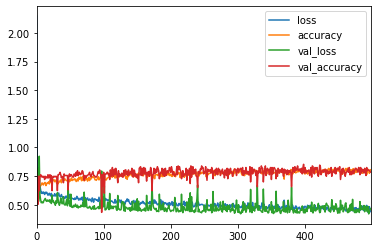

In [109]:
pd.DataFrame(history.history).plot();

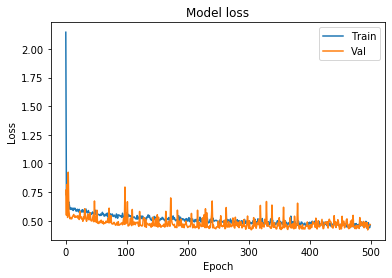

In [110]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

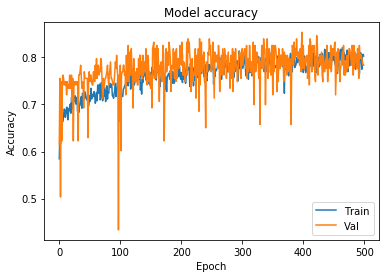

In [111]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

# 8 ใช้ผลลัพท์ (model) มา predict

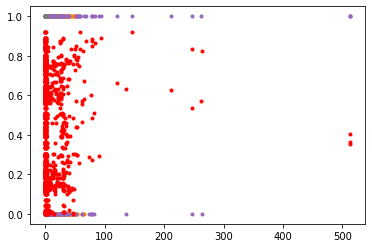

In [112]:
Z = model.predict(X_test)
plt.plot(X_test,y_test,'.')
plt.plot(X_test,Z,'.r')

# 9 save/load model เพื่อเก็บไว้ใช้ 

In [113]:
#Save Model

model.save('titanic_model.h5')

In [114]:
#Load Model
#model_2 = keras.models.load_model('titanic_model.h5')

# Lab : Hyperparameter Tune up

In [117]:
model2 = Sequential([
    Dense(60, activation='sigmoid', input_shape=(8,)),
    Dense(60, activation='relu'),
    Dense(1, activation='sigmoid'),
])

from tensorflow.keras.optimizers import Adam

model2.compile(optimizer=Adam(learning_rate=0.01),
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [118]:
history2 = model2.fit(X_train,y_train,batch_size=40, epochs=300,validation_data=(X_val,y_val))

Train on 568 samples, validate on 143 samples
Epoch 1/300
568/568 [==============================] - 2s 3ms/sample - loss: 0.6621 - accuracy: 0.6285 - val_loss: 0.5579 - val_accuracy: 0.7552
Epoch 2/300
568/568 [==============================] - 0s 171us/sample - loss: 0.6080 - accuracy: 0.6813 - val_loss: 0.5518 - val_accuracy: 0.7692
Epoch 3/300
568/568 [==============================] - 0s 170us/sample - loss: 0.5943 - accuracy: 0.6937 - val_loss: 0.5346 - val_accuracy: 0.7483
Epoch 4/300
568/568 [==============================] - 0s 178us/sample - loss: 0.5902 - accuracy: 0.6954 - val_loss: 0.5439 - val_accuracy: 0.7552
Epoch 5/300
568/568 [==============================] - 0s 174us/sample - loss: 0.5790 - accuracy: 0.6919 - val_loss: 0.5194 - val_accuracy: 0.7413
Epoch 6/300
568/568 [==============================] - 0s 187us/sample - loss: 0.5598 - accuracy: 0.7236 - val_loss: 0.5006 - val_accuracy: 0.7622
Epoch 7/300
568/568 [==============================] - 0s 160us/sample - l

In [124]:
model2.evaluate(X_test,y_test)[1]

178/178 [==============================] - 0s 158us/sample - loss: 0.5653 - accuracy: 0.7865


0.78651685